# vis-cbx-si-gpbo

In [1]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
from skopt.learning import ExtraTreesRegressor
from skopt import gp_minimize
from skopt import Optimizer
from skopt.plots import plot_gaussian_process

In [2]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

def f_wo_noise(x):
    return f(x, noise_level=0)

In [3]:
acq_func_kwargs = {"kappa": 1}

opt = Optimizer([(-2.0, 2.0)], "GP", n_initial_points=3,
                acq_func="LCB", acq_optimizer="sampling", n_random_starts=5,
                acq_func_kwargs=acq_func_kwargs)

opt = Optimizer([(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="LCB",      # the acquisition function
                  acq_func_kwargs=acq_func_kwargs,
                  n_random_starts=5,  # the number of random initialization points
                  #noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed)


plot_args = {"objective": f_wo_noise,
             "noise_level": noise_level, "show_legend": True,
             "show_title": True, "show_next_point": False,
             "show_acq_func": True}

#res = opt.run(f, n_iter=15)

for _ in range(10):
    next_x = opt.ask()
    f_val = f(next_x)
    opt.tell(next_x, f_val)

res = opt.get_result()

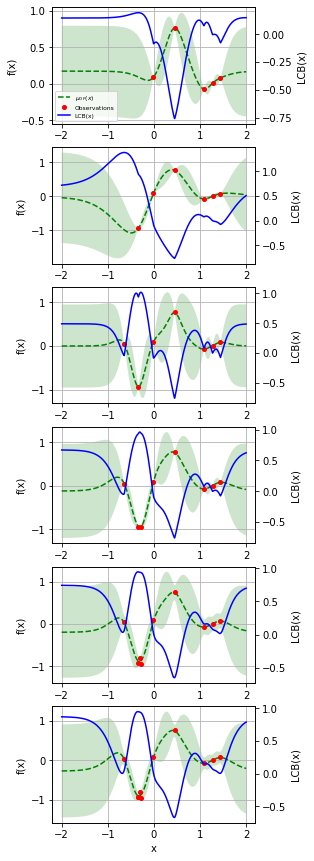

In [4]:
fig = plt.figure(figsize=(8,15))

for n_iter in range(6):
    # Plot true function.
    fig.add_subplot(6, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               #objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=True)
    
    #ax.set_ylabel("")
    #ax.set_xlabel("")

plt.show()